In [426]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [427]:
# indices en la primera columna
datos_procesados = pd.read_csv('merged_data.csv', sep=',', encoding='utf-8', index_col=0)
datos_procesados.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,...,4.417802,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,...,4.433524,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,...,4.453689,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,...,4.464517,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,...,4.462960,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340


Media: 3332.6498554717023


Text(0.5, 1.0, 'Depressive disorder rates (number suffering per 100,000)')

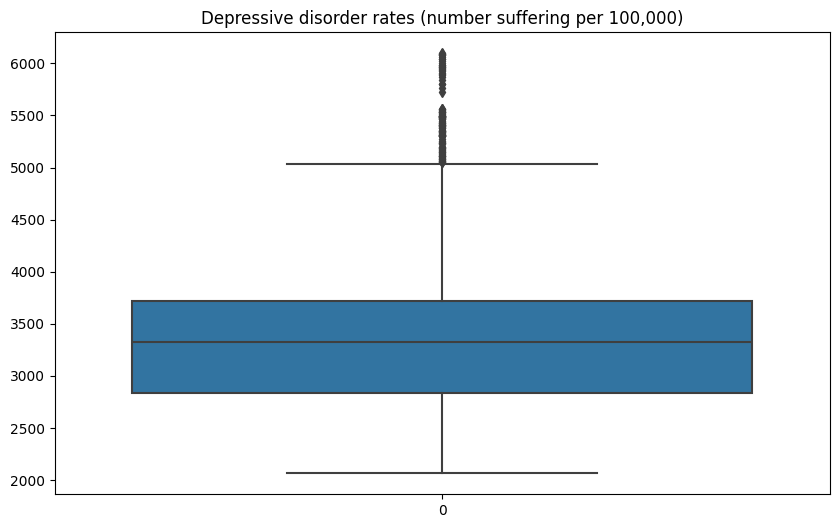

In [428]:
#sacar la media, hacer caja de bigotes de 'Depressive disorder rates (number suffering per 100,000)'

mean = datos_procesados['Depressive disorder rates (number suffering per 100,000)'].mean()
print (f'Media: {mean}')

plt.figure(figsize=(10,6))
sns.boxplot(datos_procesados['Depressive disorder rates (number suffering per 100,000)'])
plt.title('Depressive disorder rates (number suffering per 100,000)')

In [429]:
bajo = 2800
alto = 3800
datos_procesados['Depression_binary'] = np.where(datos_procesados['Depressive disorder rates (number suffering per 100,000)'] > alto, 2 , np.where(datos_procesados['Depressive disorder rates (number suffering per 100,000)'] > bajo, 1, 0)) 
datos_procesados.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,...,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766,2
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,...,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682,2
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,...,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097,2
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,...,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657,2
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,...,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340,2


In [430]:
print(datos_procesados['Depression_binary'].value_counts())

Depression_binary
1    3126
0    1239
2    1123
Name: count, dtype: int64


In [431]:
#standar scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_procesados_scaled = datos_procesados.copy()

datos_procesados_scaled.drop(['Entity', 'Code','Depression_binary'], axis=1, inplace=True)
# escalar todas las columnas, excepto entity, code y Depression_binary

datos_procesados_scaled = pd.DataFrame(scaler.fit_transform(datos_procesados_scaled), columns=datos_procesados_scaled.columns)
datos_procesados.isna().sum()
datos_procesados_scaled.head()


Entity                                                                                                       0
Code                                                                                                         0
Year                                                                                                         0
Schizophrenia (%)                                                                                            0
Bipolar disorder (%)                                                                                         0
Eating disorders (%)                                                                                         0
Anxiety disorders (%)                                                                                        0
Drug use disorders (%)                                                                                       0
Depression (%)                                                                                               0
A

In [432]:
qualitative_columns = ['Code'] 

In [433]:
#concatenar las columnas cualitativas
datos_procesados_scaled = pd.concat([datos_procesados_scaled, datos_procesados['Code']], axis=1)
datos_procesados_scaled = pd.concat([datos_procesados_scaled, datos_procesados['Depression_binary']], axis=1)
datos_procesados_scaled.head()

#datos_procesados_scaled.dropna(inplace=True)
datos_procesados_scaled.isna().sum()

Year                                                                                                         0
Schizophrenia (%)                                                                                            0
Bipolar disorder (%)                                                                                         0
Eating disorders (%)                                                                                         0
Anxiety disorders (%)                                                                                        0
Drug use disorders (%)                                                                                       0
Depression (%)                                                                                               0
Alcohol use disorders (%)                                                                                    0
Prevalence in males (%)                                                                                      0
P

In [434]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# LabelEncoder para las columnas cualitativas
label_encoder = LabelEncoder()

for column in qualitative_columns:
    datos_procesados_scaled[column] = label_encoder.fit_transform(datos_procesados_scaled[column])

datos_procesados_scaled.head()
datos_procesados_ecoding = datos_procesados_scaled.copy()

In [435]:
X = datos_procesados_ecoding.drop(columns=["Depression_binary", "Depressive disorder rates (number suffering per 100,000)"])
y = datos_procesados_ecoding["Depression_binary"]

In [436]:
from sklearn.model_selection import train_test_split

In [437]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

In [438]:
y_prueba

5374    0
4046    2
42      0
1593    1
4856    1
       ..
995     2
5361    1
3594    1
5382    1
3994    0
Name: Depression_binary, Length: 1647, dtype: int64

In [439]:
X_entreno.isna().sum()


Year                                                                                                         0
Schizophrenia (%)                                                                                            0
Bipolar disorder (%)                                                                                         0
Eating disorders (%)                                                                                         0
Anxiety disorders (%)                                                                                        0
Drug use disorders (%)                                                                                       0
Depression (%)                                                                                               0
Alcohol use disorders (%)                                                                                    0
Prevalence in males (%)                                                                                      0
P

In [440]:
from sklearn.svm import SVC
clasificador = SVC(kernel = 'linear', random_state = 0)
clasificador.fit(X_entreno, y_entreno)

SVC(kernel='linear', random_state=0)

In [441]:
y_pred = clasificador.predict(X_prueba)

In [442]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_prueba.values.reshape(len(y_prueba),1)),1))

[[0 0]
 [2 2]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [443]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat_conf = confusion_matrix(y_prueba, y_pred)
print(mat_conf)
accuracy_score(y_prueba, y_pred)

[[347   7   0]
 [  6 959   2]
 [  0   9 317]]


0.9854280510018215